<a href="https://colab.research.google.com/github/surajpandey11/Startup_funding_prediction/blob/main/Copy_of_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
startup_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/Day 1/Copy of data_driven_investment_1.csv')

In [5]:
startup_df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [6]:
startup_df.shape

(1502175, 20)

In [7]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [8]:
startup_df['Application Category'].value_counts()

Education                  202514
Tools                      139262
Business                    87780
Books & Reference           85189
Entertainment               76582
Productivity                63135
Personalization             62694
Finance                     60828
Photography                 56762
Music & Audio               55885
Lifestyle                   53462
Social                      38896
Communication               37143
Travel & Local              37100
Health & Fitness            36996
Shopping                    31776
Simulation                  29967
News & Magazines            27598
Casual                      25771
Action                      24972
Video Players & Editors     24309
Puzzle                      24304
Sports                      20217
Arcade                      18639
Medical                     17691
Educational                 14675
Food & Drink                14230
Maps & Navigation           14028
Racing                      13608
Adventure     

In [9]:
startup_df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                                                           232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                                              124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                                                117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                        

In [10]:
startup_df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [11]:
startup_df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
3598bebb3e062eca345c197772c3a7280e45f6c7       1
1b32259c89ad3d07519f0aefd7845decbee02077       1
333964ba15203a6fb3c573e779df1349a000056a       1
0bb61cd2c6a8ca775eef3bbb168b853b7aeb615b       1
5710bedcd0d27af7edf41d73b29e8a8c37d524b1       1
Name: UUID, Length: 147741, dtype: int64

In [12]:
def datetime(x):
  import datetime
  x=str(x)
  a=int(x[0:4])
  b=int(x[4:6])
  c=int(x[6:])
  

  x = datetime.datetime(a, b, c)
  x.strftime("%Y %b %d")

  return x

In [13]:
startup_df['Month1']=startup_df['month'].apply(lambda x:datetime(x))

In [14]:
startup_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month1
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,2018-08-01
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,2018-08-01
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0,2018-08-01
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0,2018-08-01
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01


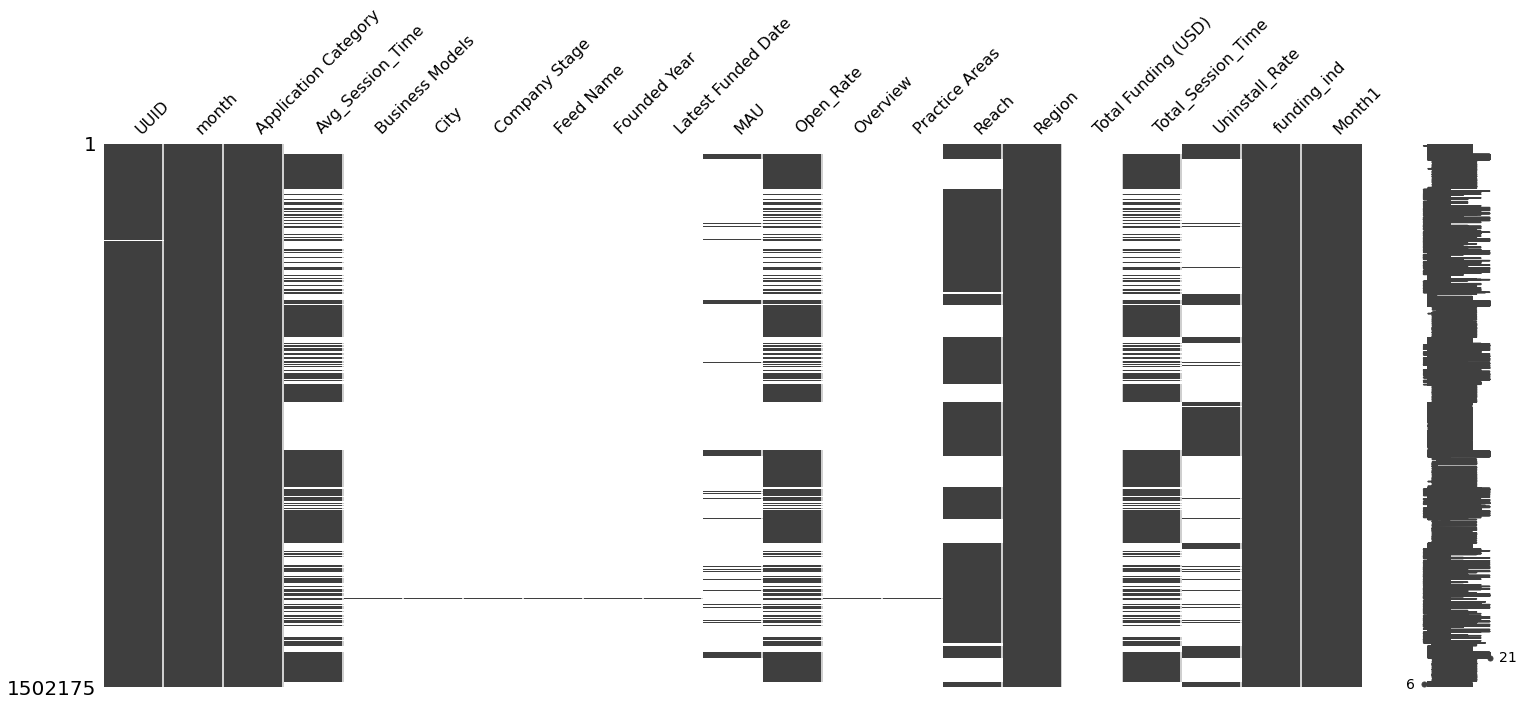

In [15]:
import pandas as pd 
import missingno as msno 
  
# Loading the dataset 

  
# Visualize missing values as a matrix 
msno.matrix(startup_df) 

In [16]:
startup_df['Month2'] = pd.to_datetime(startup_df['Month1'])

startup_df['Month'] = startup_df['Month2'].dt.date

startup_df['month_of_date'] = startup_df['Month1'].dt.month
startup_df['user_created_at_year_month'] = startup_df['Month1'].dt.strftime('%Y-%m')

In [17]:
startup_df.drop(columns=['Month1','Month2'],inplace=True)

## Not Funded Yet

In [18]:
partcular_df=startup_df[startup_df['UUID']== '4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27']

In [19]:
partcular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
1525,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000585,National,NaN,NaN,0.206667,0,2018-08-01,8,2018-08
2432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001211,National,NaN,NaN,0.116183,0,2018-08-01,8,2018-08
2433,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000104,National,NaN,NaN,0.333333,0,2018-08-01,8,2018-08
2434,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000262,National,NaN,NaN,0.085106,0,2018-08-01,8,2018-08
4238,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004756,National,NaN,NaN,0.072319,0,2018-08-01,8,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492313,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000857,National,NaN,NaN,0.004444,0,2019-01-01,1,2019-01
1492314,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000080,National,NaN,NaN,0.192308,0,2019-01-01,1,2019-01
1492315,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011600,National,NaN,NaN,0.002427,0,2019-01-01,1,2019-01
1495432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034384,National,NaN,NaN,0.088980,0,2019-01-01,1,2019-01


In [20]:
partcular_df['funding_ind'].value_counts()

0    2671
Name: funding_ind, dtype: int64

In [21]:
partcular_df['MAU'].value_counts()

0.200000    4
0.285714    3
0.333333    3
0.166667    3
0.266667    2
           ..
0.215905    1
0.163096    1
0.159501    1
0.170526    1
0.571429    1
Name: MAU, Length: 728, dtype: int64

In [22]:
partcular_df['Avg_Session_Time'].value_counts()

1.466891    1
0.749775    1
0.076580    1
1.182693    1
2.268371    1
           ..
0.786426    1
1.170824    1
0.829476    1
0.702903    1
0.483950    1
Name: Avg_Session_Time, Length: 1049, dtype: int64

In [23]:
partcular_df = partcular_df.sort_values('Month')

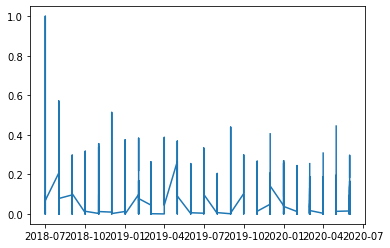

In [24]:
plt.plot(partcular_df['Month'],partcular_df['Uninstall_Rate'])

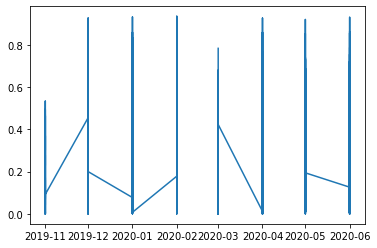

In [25]:
plt.plot(partcular_df['Month'],partcular_df['MAU'])

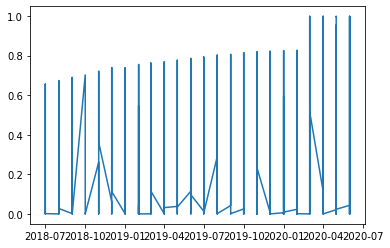

In [26]:
plt.plot(partcular_df['Month'],partcular_df['Reach'])

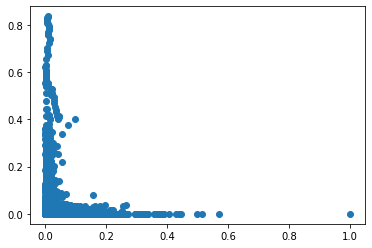

In [27]:
plt.scatter(partcular_df['Uninstall_Rate'],partcular_df['Reach'])

In [28]:
a=startup_df.groupby('UUID')

In [29]:
funded_df=startup_df[startup_df['funding_ind']==1]

In [30]:
funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018-08-01,8,2018-08
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,8,2018-08
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,8,2018-08
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018-08-01,8,2018-08
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018-08-01,8,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01,1,2019-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01,1,2019-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01,1,2019-01
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1,2019-01-01,1,2019-01


In [31]:
funded_df['Practice Areas'].value_counts()

FinTech                                                                                                                                                                             306
Consumer\nMedia & Entertainment\nEdTech                                                                                                                                             233
Media & Entertainment                                                                                                                                                               133
EdTech\nEdTech\nAccelerator Batches                                                                                                                                                 120
Consumer                                                                                                                                                                            117
                                                                                

In [32]:
funded_df['City'].value_counts()

Bangalore                   686
Gurgaon                     526
Delhi                       475
Mumbai                      356
Kingstown\nMumbai           107
Pune                         69
Noida                        35
Hyderabad                    31
San Mateo\nChennai           21
Chennai                      21
Ahmedabad                    16
Kolkata                       7
Jaipur                        7
Dublin\nBangalore             6
Kota                          6
Singapore\nGurgaon            5
San Francisco\nBangalore      3
Bhopal                        3
London                        3
Coimbatore                    3
Hangzhou\nDelhi               3
Singapore\nBangalore          3
Panaji                        3
Bangalore\nMumbai             3
Kochi                         2
Fremont\nMumbai               2
Chicago\nNoida                2
Faridabad                     1
Kanpur                        1
London\nNoida                 1
Name: City, dtype: int64

In [33]:
a=list(funded_df['UUID'])

### Funded 

In [34]:
funded_particular_df=startup_df[startup_df['UUID']== '30274688a665c39d0b9691836e24e2fb9afce6fe']

In [35]:
funded_particular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
11790,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000109,National,NaN,NaN,0.074074,0,2018-08-01,8,2018-08
11791,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000212,National,NaN,NaN,0.103448,0,2018-08-01,8,2018-08
11792,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000139,National,NaN,NaN,0.142857,0,2018-08-01,8,2018-08
11793,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,National,NaN,NaN,0.000000,0,2018-08-01,8,2018-08
11794,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000126,National,NaN,NaN,0.052632,0,2018-08-01,8,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500586,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000067,National,14634837.0,NaN,0.068966,1,2019-01-01,1,2019-01
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01,1,2019-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01,1,2019-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01,1,2019-01


In [36]:
funded_particular_df = funded_particular_df.sort_values('Month')

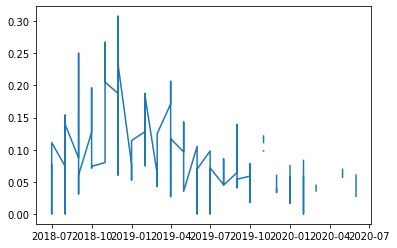

In [37]:

plt.plot(funded_particular_df['Month'],funded_particular_df['Uninstall_Rate'])

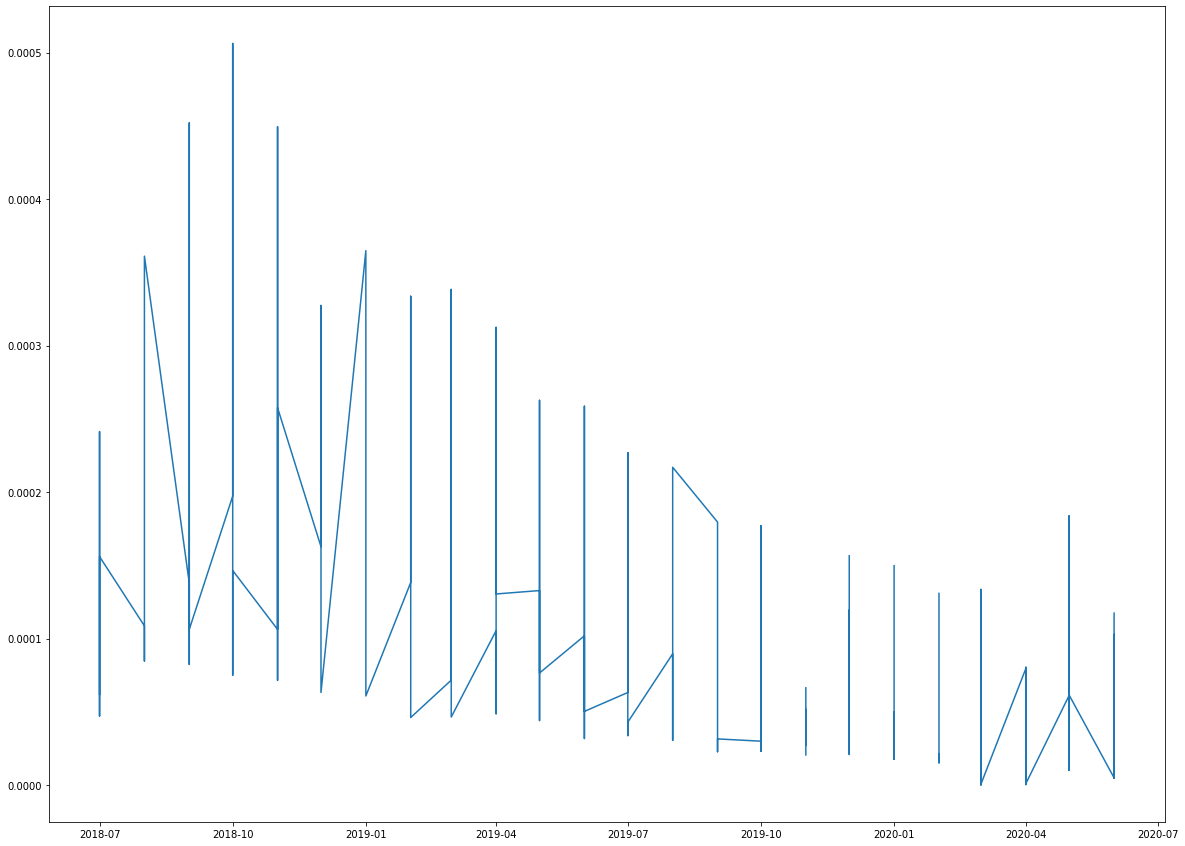

In [38]:
plt.figure(figsize=(20,15))
plt.plot(funded_particular_df['Month'],(funded_particular_df['Reach']))

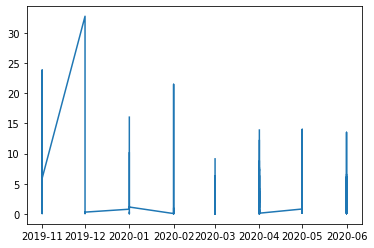

In [39]:
plt.plot(funded_particular_df['Month'],funded_particular_df['Avg_Session_Time'])

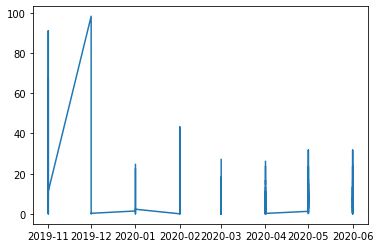

In [40]:
plt.plot(funded_particular_df['Month'],funded_particular_df['Total_Session_Time'])

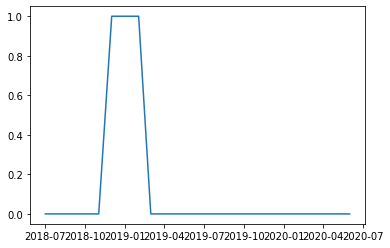

In [41]:
plt.plot(funded_particular_df['Month'],funded_particular_df['funding_ind'])

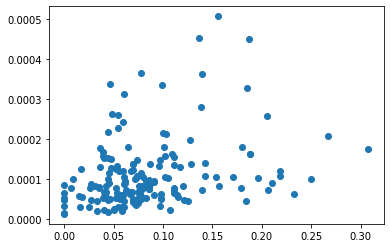

In [42]:
plt.scatter(funded_particular_df['Uninstall_Rate'],funded_particular_df['Reach'])

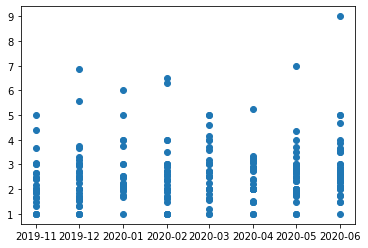

In [43]:
plt.scatter(funded_particular_df['Month'],funded_particular_df['Open_Rate'])

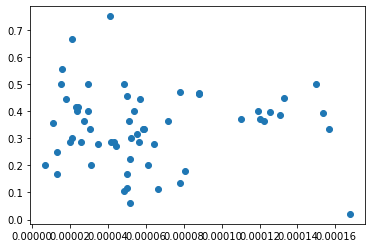

In [44]:
plt.scatter(funded_particular_df['Reach'],funded_particular_df['MAU'])

## Funded in starting

In [45]:
funded_particular_df_1=startup_df[startup_df['UUID']== 'cae68bf26bf59549fac77ec044954f939ab28c28']

In [46]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,8,2018-08
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0,2019-06-01,6,2019-06
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0,2019-12-01,12,2019-12
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0,2020-03-01,3,2020-03
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2,2019-02
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0,2020-02-01,2,2020-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,3,2019-03
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0,2020-06-01,6,2020-06
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,9,2018-09
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0,2019-07-01,7,2019-07


In [47]:
# import datetime

In [48]:
# def datetime(x):
#   import datetime
#   x=str(x)
#   a=int(x[0:4])
#   b=int(x[4:6])
#   c=int(x[6:])
  

#   x = datetime.datetime(a, b, c)
#   x.strftime("%Y %b %d")

#   return x


In [49]:
# funded_particular_df_1['Month']=funded_particular_df_1['month'].apply(lambda x:datetime(x))

In [50]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,8,2018-08
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0,2019-06-01,6,2019-06
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0,2019-12-01,12,2019-12
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0,2020-03-01,3,2020-03
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2,2019-02
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0,2020-02-01,2,2020-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,3,2019-03
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0,2020-06-01,6,2020-06
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,9,2018-09
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0,2019-07-01,7,2019-07


In [51]:
# from datetime import datetime

In [52]:
funded_particular_df_1 = funded_particular_df_1.sort_values('Month') 

In [53]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
794326,cae68bf26bf59549fac77ec044954f939ab28c28,20180701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000191,National,NaN,NaN,0.100000,0,2018-07-01,7,2018-07
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,8,2018-08
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01,9,2018-09
807296,cae68bf26bf59549fac77ec044954f939ab28c28,20181001,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000115,National,1220353.0,NaN,0.269841,1,2018-10-01,10,2018-10
821177,cae68bf26bf59549fac77ec044954f939ab28c28,20181101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,National,NaN,NaN,0.229508,0,2018-11-01,11,2018-11
748076,cae68bf26bf59549fac77ec044954f939ab28c28,20181201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000078,National,NaN,NaN,0.322581,0,2018-12-01,12,2018-12
1490065,cae68bf26bf59549fac77ec044954f939ab28c28,20190101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000074,National,NaN,NaN,0.142857,0,2019-01-01,1,2019-01
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01,2,2019-02
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01,3,2019-03
1107382,cae68bf26bf59549fac77ec044954f939ab28c28,20190401,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000083,National,NaN,NaN,0.200000,0,2019-04-01,4,2019-04


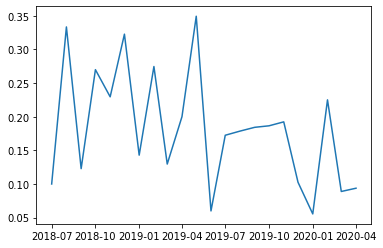

In [54]:
plt.plot(funded_particular_df_1['Month'],(funded_particular_df_1['Uninstall_Rate']))

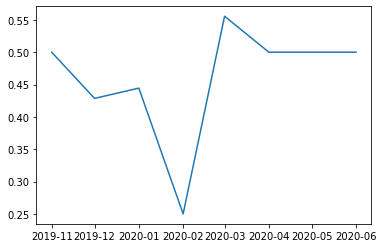

In [55]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['MAU'])

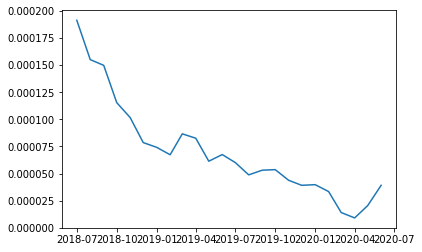

In [56]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Reach'])

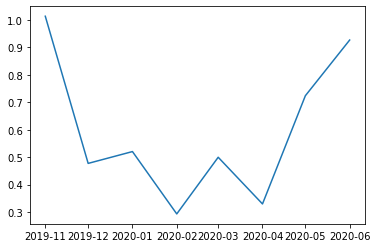

In [57]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Avg_Session_Time'])

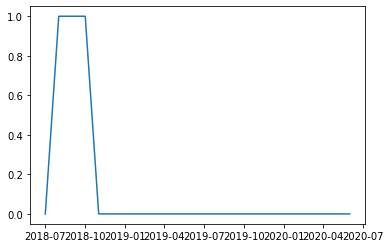

In [58]:
plt.plot(funded_particular_df_1['Month'],(funded_particular_df_1['funding_ind']))

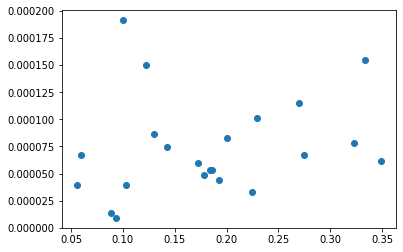

In [59]:
plt.scatter(funded_particular_df_1['Uninstall_Rate'],(funded_particular_df_1['Reach']))

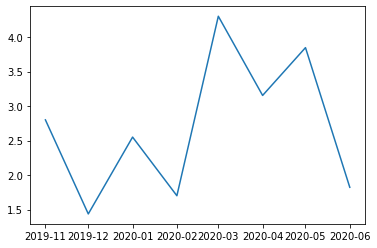

In [60]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Open_Rate'])

In [61]:
funded_particular_df_2=startup_df[startup_df['UUID']== '1579dd1ed49a18f4f7520a91721c6e435f7c588e']

In [62]:
funded_particular_df_2

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,8,2018-08
13470,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190601,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000651,National,NaN,NaN,0.194954,0,2019-06-01,6,2019-06
29429,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20191201,Social,2.049333,NaN,NaN,NaN,NaN,NaN,NaN,0.407643,9.009075,NaN,NaN,0.000383,National,NaN,17.946574,0.146635,0,2019-12-01,12,2019-12
131551,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200301,Social,1.820479,NaN,NaN,NaN,NaN,NaN,NaN,0.157534,15.797934,NaN,NaN,0.000152,National,NaN,28.190716,0.068966,0,2020-03-01,3,2020-03
417801,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000578,National,NaN,NaN,0.230303,0,2019-02-01,2,2019-02
432787,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200201,Social,2.158660,NaN,NaN,NaN,NaN,NaN,NaN,0.338346,16.013133,NaN,NaN,0.000256,National,NaN,34.660809,0.114068,0,2020-02-01,2,2020-02
536961,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190301,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610,National,NaN,NaN,0.238636,0,2019-03-01,3,2019-03
554053,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20200601,Social,1.945067,NaN,NaN,NaN,NaN,NaN,NaN,0.362205,11.458453,NaN,NaN,0.000083,National,NaN,22.653343,0.127451,0,2020-06-01,6,2020-06
716125,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180901,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000817,National,NaN,NaN,0.262887,0,2018-09-01,9,2018-09
729696,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190701,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000605,National,NaN,NaN,0.198068,0,2019-07-01,7,2019-07


In [63]:
funded_particular_df_2 = funded_particular_df_2.sort_values('Month') 

In [64]:
funded_particular_df_2

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
792287,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180701,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000674,National,4473029.0,NaN,0.207407,1,2018-07-01,7,2018-07
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,8,2018-08
716125,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180901,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000817,National,NaN,NaN,0.262887,0,2018-09-01,9,2018-09
805071,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181001,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000724,National,NaN,NaN,0.275093,0,2018-10-01,10,2018-10
818883,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181101,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000700,National,NaN,NaN,0.295699,0,2018-11-01,11,2018-11
745749,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20181201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000546,National,NaN,NaN,0.389423,0,2018-12-01,12,2018-12
1487684,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190101,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000588,National,NaN,NaN,0.161765,0,2019-01-01,1,2019-01
417801,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190201,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000578,National,NaN,NaN,0.230303,0,2019-02-01,2,2019-02
536961,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190301,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610,National,NaN,NaN,0.238636,0,2019-03-01,3,2019-03
1104879,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20190401,Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000682,National,NaN,NaN,0.202970,0,2019-04-01,4,2019-04


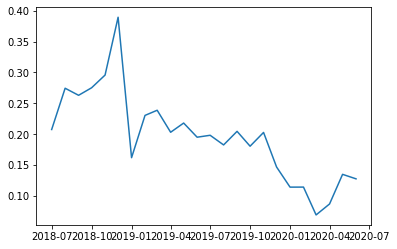

In [65]:
plt.plot(funded_particular_df_2['Month'],(funded_particular_df_2['Uninstall_Rate']))

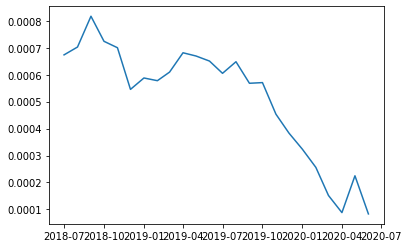

In [66]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Reach'])

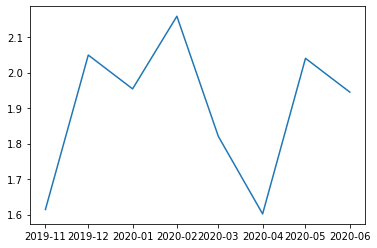

In [67]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Avg_Session_Time'])

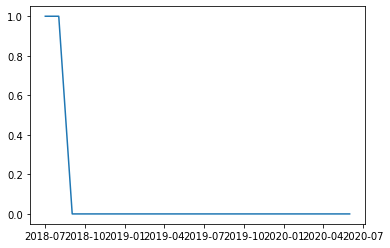

In [68]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['funding_ind'])

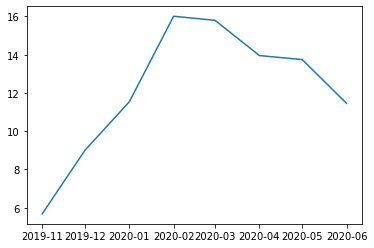

In [69]:
plt.plot(funded_particular_df_2['Month'],funded_particular_df_2['Open_Rate'])

In [70]:
# gb = startup_df.groupby(tuple(startup_df.columns.difference(['Value'])))
# result = pd.DataFrame(gb['Value'].unique(), columns=startup_df.columns)

In [71]:
startup_df1=startup_df.groupby('UUID', as_index=False).agg(list)

In [72]:
startup_df1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[20200301, 20200301, 20200601, 20200401]","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[National, National, National, National]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]","[2020-03-01, 2020-03-01, 2020-06-01, 2020-04-01]","[3, 3, 6, 4]","[2020-03, 2020-03, 2020-06, 2020-04]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[20200401],[Finance],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[National],[nan],[nan],[nan],[0],[2020-04-01],[4],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[20200301, 20200201, 20200601, 20200501, 20200...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2020-03-01, 2020-02-01, 2020-06-01, 2020-05-0...","[3, 2, 6, 5, 4]","[2020-03, 2020-02, 2020-06, 2020-05, 2020-04]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[20200301, 20200501, 20200401]","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[National, National, National]","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]","[2020-03-01, 2020-05-01, 2020-04-01]","[3, 5, 4]","[2020-03, 2020-05, 2020-04]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[20200301],[Shopping],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[National],[nan],[nan],[nan],[0],[2020-03-01],[3],[2020-03]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[20191201, 20200301, 20200601, 20200501, 20200...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2019-12-01, 2020-03-01, 2020-06-01, 2020-05-0...","[12, 3, 6, 5, 4]","[2019-12, 2020-03, 2020-06, 2020-05, 2020-04]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[20200301, 20200301, 20200301, 20200301, 20200...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, n

In [73]:
month_dummies = pd.get_dummies(startup_df.user_created_at_year_month)
startup_df2=pd.concat([startup_df, month_dummies], axis=1)


In [74]:
startup_df1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[20200301, 20200301, 20200601, 20200401]","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[National, National, National, National]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]","[2020-03-01, 2020-03-01, 2020-06-01, 2020-04-01]","[3, 3, 6, 4]","[2020-03, 2020-03, 2020-06, 2020-04]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[20200401],[Finance],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[National],[nan],[nan],[nan],[0],[2020-04-01],[4],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[20200301, 20200201, 20200601, 20200501, 20200...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2020-03-01, 2020-02-01, 2020-06-01, 2020-05-0...","[3, 2, 6, 5, 4]","[2020-03, 2020-02, 2020-06, 2020-05, 2020-04]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[20200301, 20200501, 20200401]","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[National, National, National]","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]","[2020-03-01, 2020-05-01, 2020-04-01]","[3, 5, 4]","[2020-03, 2020-05, 2020-04]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[20200301],[Shopping],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[National],[nan],[nan],[nan],[0],[2020-03-01],[3],[2020-03]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[20191201, 20200301, 20200601, 20200501, 20200...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2019-12-01, 2020-03-01, 2020-06-01, 2020-05-0...","[12, 3, 6, 5, 4]","[2019-12, 2020-03, 2020-06, 2020-05, 2020-04]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[20200301, 20200301, 20200301, 20200301, 20200...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, n

In [75]:
def encode(elem):

  if(elem=='2018-07'):
    return 1
  elif elem=='2018-08':
    return 2
  elif elem=='2018-09':
    return 3
  elif elem=='2018-10':
    return 4
  elif elem=='2018-11':
    return 5
  elif elem=='2018-12':
    return 6
  elif elem=='2019-01':
    return 7
  elif elem=='2019-02':
    return 8
  elif elem=='2019-03':
    return 9
  elif elem=='2019-04':
    return 10
  elif elem=='2019-05':
    return 11
  elif elem=='2019-06':
    return 12
  elif elem=='2019-07':
    return 13
  elif elem=='2019-08':
    return 14
  elif elem=='2019-09':
    return 15
  elif elem=='2019-10':
    return 16
  elif elem=='2019-11':
    return 17
  elif elem=='2019-12':
    return 18
  elif elem=='2020-01':
    return 19
  elif elem=='2020-02':
    return 20
  elif elem=='2020-03':
    return 21
  elif elem=='2020-04':
    return 22
  elif elem=='2020-05':
    return 23
  else:
    return 24
  


In [76]:
dict_df={'UUID_NEW':,	"start_up_df_mid":,	'UUID':,	"month":,	'Application Category':,	'Avg_Session_Time':,	"Business Models":,	"City":,	'Company':, "Stage":,	"Feed Name":,	"Founded Year":,	"Latest Funded Date":,	"MAU":,	"Open_Rate":,	Overview	Practice Areas	Reach	Region	Total Funding (USD)	Total_Session_Time	Uninstall_Rate	funding_ind	Month	month_of_date	user_created_at_year_month}
for element in list(startup_df1['UUID']):

  f_df=pd.DataFrame()
  start_up_df_mid=startup_df[startup_df['UUID']==element]

  start_up_df_mid['start_up_df_mid']=start_up_df_mid['user_created_at_year_month'].apply(lambda x:encode(x))
  startup_df21=start_up_df_mid.groupby('start_up_df_mid', as_index=False).agg(list)
  startup_df21['UUID_NEW']=startup_df21['UUID'].apply(lambda x:x[0])
  startup_df21=startup_df21.groupby('UUID_NEW', as_index=False).agg(list)
  f_df=startup_df21
  
  break

SyntaxError: ignored

In [ ]:
startup_df21

In [ ]:
# start_up_df_mid['usedid_code']=

In [ ]:
# start_up_df_mid

In [78]:
startup_df1=startup_df1.groupby('UUID', as_index=False).agg(list)

KeyboardInterrupt: ignored

In [ ]:
startup_df1

In [ ]:
startup_df

In [ ]:
import seaborn as sns

In [ ]:
plt.plot(startup_df['Reach'][0])

In [ ]:
print(startup_df['Reach'][0])

In [ ]:
def pred(x):
  if sum(x)>0:
    return 1
  else:
    return 0
  
   

In [77]:
startup_df1['funded_or_not']=startup_df1['funding_ind'].apply(lambda x: pred(x))

NameError: ignored

In [79]:
startup_df1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
0,000066f130e3b972364c505c805e2cddee68816d,"[20200301, 20200301, 20200601, 20200401]","[Business, Business, Business, Business]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[1.9720882462160069e-07, 1.9720882462160069e-0...","[National, National, National, National]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[0, 0, 0, 0]","[2020-03-01, 2020-03-01, 2020-06-01, 2020-04-01]","[3, 3, 6, 4]","[2020-03, 2020-03, 2020-06, 2020-04]"
1,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,[20200401],[Finance],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[3.022202611485277e-07],[National],[nan],[nan],[nan],[0],[2020-04-01],[4],[2020-04]
2,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,"[20200301, 20200201, 20200601, 20200501, 20200...","[Social, Social, Social, Social, Social]","[nan, 1.4710444444444446, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 3.0, 1.0, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.3665058954592075e-06, nan, 4.88937782667155...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[nan, 4.413133333333334, 0.4866, nan, nan]","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2020-03-01, 2020-02-01, 2020-06-01, 2020-05-0...","[3, 2, 6, 5, 4]","[2020-03, 2020-02, 2020-06, 2020-05, 2020-04]"
3,000127cbe70aeeab81734b68f409176bd1f1fde8,"[20200301, 20200501, 20200401]","[Personalization, Personalization, Personaliza...","[0.1902, 0.3642166666666667, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[2.0, 1.0, nan]","[nan, nan, nan]","[nan, nan, nan]","[1.9720882462160069e-07, nan, 3.02220261148527...","[National, National, National]","[nan, nan, nan]","[0.3804, 0.3642166666666667, nan]","[nan, nan, nan]","[0, 0, 0]","[2020-03-01, 2020-05-01, 2020-04-01]","[3, 5, 4]","[2020-03, 2020-05, 2020-04]"
4,00017d2a013dc43f0e34de1be4beca443713ec80,[20200301],[Shopping],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[1.9720882462160069e-07],[National],[nan],[nan],[nan],[0],[2020-03-01],[3],[2020-03]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147736,fffe942f59aaf6d4a4119f1538cda1e4e69e9d8d,"[20191201, 20200301, 20200601, 20200501, 20200...","[Tools, Tools, Tools, Tools, Tools]","[0.3578083333333332, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[2.0, nan, 1.0, 1.0, 2.0]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, 5.916264738648019e-07, 4.889377826671556...","[National, National, National, National, Natio...","[nan, nan, nan, nan, nan]","[0.7156166666666669, nan, 0.2699, 0.5518333333...","[nan, nan, nan, nan, nan]","[0, 0, 0, 0, 0]","[2019-12-01, 2020-03-01, 2020-06-01, 2020-05-0...","[12, 3, 6, 5, 4]","[2019-12, 2020-03, 2020-06, 2020-05, 2020-04]"
147737,ffff383fa0831aa6d2c5d9257194d0d89841422d,"[20200301, 20200301, 20200301, 20200301, 20200...","[Card, Card, Card, Card, Card, Card, Card, Car...","[13.552092152777774, 2.9301666666666666, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, n

In [ ]:
startup_df1['funded_or_not'].value_counts()

In [80]:
companies_funded = list(startup_df[startup_df['funding_ind']==1]['UUID'].unique())

In [81]:
funded_df = startup_df[startup_df['funding_ind']==1]

In [82]:
funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month,month_of_date,user_created_at_year_month
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018-08-01,8,2018-08
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01,8,2018-08
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01,8,2018-08
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018-08-01,8,2018-08
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018-08-01,8,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01,1,2019-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01,1,2019-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01,1,2019-01
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1,2019-01-01,1,2019-01


In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
import time
import datetime
import math
from sklearn.metrics import *

In [84]:
last_fund_dict = {}
for company in companies_funded:
  last_fund_dict[company] = datetime.datetime.strptime(funded_df[funded_df['UUID']==company]['Latest Funded Date'].values[0],'%Y-%m-%d')

In [85]:
use_df = startup_df[['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time','funding_ind']]

In [86]:
use_df

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,0.042963,NaN,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,0.003244,NaN,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,0.000161,NaN,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,0.000077,NaN,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,0.000939,NaN,0
...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,0
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,0
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,0
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,0


In [87]:
use_df['month'] = use_df['month'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y%m%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
use_df

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,2018-08-01,Books & Reference,NaN,NaN,0.042963,NaN,0
1,d841e670d9191f896a0cbc75961920887b375756,2018-08-01,Books & Reference,NaN,NaN,0.003244,NaN,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,2018-08-01,Finance,NaN,NaN,0.000161,NaN,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,2018-08-01,Books & Reference,NaN,NaN,0.000077,NaN,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,2018-08-01,Productivity,NaN,NaN,0.000939,NaN,0
...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,2019-01-01,Action,NaN,NaN,NaN,NaN,0
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,2019-01-01,Video Players & Editors,NaN,NaN,NaN,NaN,0
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,2019-01-01,Action,NaN,NaN,NaN,NaN,0
1502173,83016b735683928472e8043a51e5f9932e79db09,2019-01-01,Tools,NaN,NaN,NaN,NaN,0


In [89]:
use_df['target'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
def filter_target(x):
  if (last_fund_dict[x['UUID']] - x['month']).days < 84 and (last_fund_dict[x['UUID']] - x['month']).days > 0:
    return 1
  return 0

In [91]:
for company in companies_funded:
  use_df.loc[use_df['UUID']== company, 'target'] = use_df.loc[use_df['UUID']== company,['UUID','month',]].apply(filter_target,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [95]:
use_df

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
0,c1ad38e2d357610c129657d870ede902e8abfcb9,2018-08-01,Books & Reference,NaN,NaN,0.042963,NaN,0,0
1,d841e670d9191f896a0cbc75961920887b375756,2018-08-01,Books & Reference,NaN,NaN,0.003244,NaN,0,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,2018-08-01,Finance,NaN,NaN,0.000161,NaN,0,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,2018-08-01,Books & Reference,NaN,NaN,0.000077,NaN,0,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,2018-08-01,Productivity,NaN,NaN,0.000939,NaN,0,0
...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,2019-01-01,Action,NaN,NaN,NaN,NaN,0,0
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,2019-01-01,Video Players & Editors,NaN,NaN,NaN,NaN,0,0
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,2019-01-01,Action,NaN,NaN,NaN,NaN,0,0
1502173,83016b735683928472e8043a51e5f9932e79db09,2019-01-01,Tools,NaN,NaN,NaN,NaN,0,0


In [96]:
use_df['target'].value_counts()

0    1500406
1       1769
Name: target, dtype: int64

In [97]:
# for elem in list(use_df.columns):
#   meadian_value=use_df[elem].median()
#   use_df[elem]=use_df[elem].fillna(median_value)
  

TypeError: ignored

In [ ]:
# from sklearn.preprocessing import Imputer

In [98]:
new_df = use_df.interpolate().ffill().bfill()

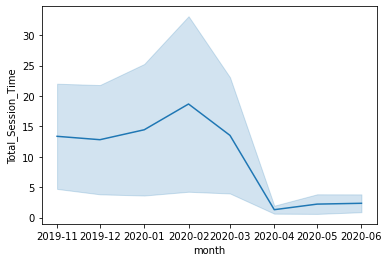

In [99]:
sns.lineplot(x = use_df[use_df['UUID']==companies_funded[200]]['month'],y = use_df[use_df['UUID']==companies_funded[200]]['Total_Session_Time'])

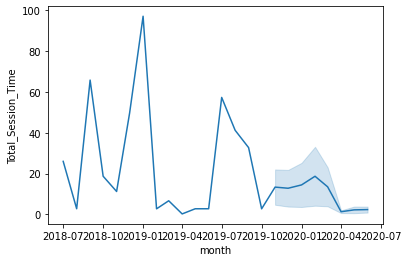

In [100]:
sns.lineplot(x = new_df[new_df['UUID']==companies_funded[200]]['month'],y = new_df[new_df['UUID']==companies_funded[200]]['Total_Session_Time'])

In [103]:
def mode(l):
  return l[len(l)//2]

In [104]:
dicta  = {'Application Category': mode,'Avg_Session_Time': stats.mean,'Open_Rate': stats.mean,'Reach': stats.mean,'UUID':mode,'month':mode,'Total_Session_Time': stats.mean,'funding_ind': np.max,'target': np.max}

In [105]:
new1_df = new_df.groupby(['UUID','month']).agg(np.mean)

In [108]:
new1_df

Avg_Session_Time  ...  target
UUID                                     month                         ...        
000066f130e3b972364c505c805e2cddee68816d 2020-03-01          1.770609  ...     0.0
                                         2020-04-01          1.677997  ...     0.0
                                         2020-06-01          0.939296  ...     0.0
0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b 2020-04-01          0.627004  ...     0.0
0000d19d56df9df1f266fc1fd245a37ff27fb1f3 2020-02-01          1.471044  ...     0.0
...                                                               ...  ...     ...
ffff67b9dfc65a5f1f146d681497a933998c2256 2020-06-01          1.372511  ...     0.0
ffff74dbc24df592b6355be32f5a71adeefb3b48 2020-04-01          6.976194  ...     0.0
ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac 2020-02-01          0.062117  ...     0.0
                                         2020-03-01          2.016966  ...     0.0
                                         2020-04-01          3.477802  ...     0.0

[757290 rows x 6 columns]

In [107]:
new1_df.describe()

,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
count,757290.000000,757290.000000,757290.000000,757290.000000,757290.00000,757290.000000
mean,1.324888,3.685998,0.003559,11.470518,0.00156,0.001315
std,1.691821,3.618968,0.012061,19.335313,0.03946,0.036232
min,0.000033,1.000000,0.000000,0.000033,0.00000,0.000000
25%,0.487403,2.046831,0.000002,1.676714,0.00000,0.000000
50%,0.849892,2.813732,0.000085,3.532837,0.00000,0.000000
75%,1.461444,4.054996,0.000902,10.128173,0.00000,0.000000
max,57.053500,80.000000,0.999041,149.670583,1.00000,1.000000


In [109]:
def conv1(x):
  if x>0:
    return 1
  return 0

In [110]:
new1_df['funding_ind'] = new1_df['funding_ind'].apply(conv1)
new1_df['target'] = new1_df['target'].apply(conv1)

In [111]:
new1_df = new1_df.reset_index()

In [112]:
new1_df['Avg_Session_Time_1'] = 0
new1_df['Avg_Session_Time_2'] = 0
new1_df['Avg_Session_Time_3'] = 0

In [113]:
new1_df['Reach1'] = 0
new1_df['Reach2'] = 0
new1_df['Reach3'] = 0

In [114]:
new1_df['Open_Rate1'] = 0
new1_df['Open_Rate2'] = 0
new1_df['Open_Rate3'] = 0

In [115]:
new1_df['Total_Session_Time1'] = 0
new1_df['Total_Session_Time2'] = 0
new1_df['Total_Session_Time3'] = 0

In [116]:
total_company_list = list(new1_df['UUID'].unique())

In [118]:
for company in total_company_list:
  for i in range(1,4):
    new1_df.loc[new1_df['UUID']==company,'Avg_Session_Time_'+str(i)] = new1_df.loc[new1_df['UUID']==company,'Avg_Session_Time'][i:]+new1_df.loc[new1_df['UUID']==company,'Avg_Session_Time'][:i]
    new1_df.loc[new1_df['UUID']==company,'Total_Session_Time'+str(i)] = new1_df.loc[new1_df['UUID']==company,'Total_Session_Time'][i:]+new1_df.loc[new1_df['UUID']==company,'Total_Session_Time'][:i]
    new1_df.loc[new1_df['UUID']==company,'Open_Rate'+str(i)] = new1_df.loc[new1_df['UUID']==company,'Open_Rate'][i:]+new1_df.loc[new1_df['UUID']==company,'Open_Rate'][:i]
    new1_df.loc[new1_df['UUID']==company,'Reach'+str(i)] = new1_df.loc[new1_df['UUID']==company,'Reach'][i:]+new1_df.loc[new1_df['UUID']==company,'Reach'][:i]

KeyboardInterrupt: ignored

In [132]:
#Class for Storing Fitted Models
import pickle
class save_model:
  def __init__ (self,filepath):
    self.filepath = filepath

  def load(self,name = None):
    '''
    Name : if you know the name you can extract the exact model, else you can give a specific name to extract that model.
    '''
    model_file = open(self.filepath,'rb')
    try:
      models =  pickle.load(model_file)
    except:
      model_file = {}
    model_file.close()
    if name:
      return models[name]
    else:
      return models
    

  def save(self,model,name):
    try:
      models = self.load()
    except:
      models = {}
    models[name] = model
    model_file = open(self.filepath,'wb')
    pickle.dump(models,model_file)
    model_file.close()
    return f'Dumped Model {name}'
    
  def delete(self,name):
    try:
      models = self.load()
    except:
      return f'No Models in dump'
    try:
      models.pop(name)
    except:
      return f"ENTER A VALID NAME"
    model_file = open(self.filepath,'wb')
    pickle.dump(models,model_file)
    model_file.close()
    return f'{name} Deleted'

sm = save_model('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/Day 1/Copy of Copy of model_dump')

In [136]:
df=sm.load('Filled_dataframe')

In [137]:
df

,UUID,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
0,000066f130e3b972364c505c805e2cddee68816d,2020-03-01,1.770609,2.559767,1.972088e-07,3.641276,0,0
1,000066f130e3b972364c505c805e2cddee68816d,2020-04-01,1.677997,1.529412,3.022203e-07,3.051982,0,0
2,000066f130e3b972364c505c805e2cddee68816d,2020-06-01,0.939296,1.888889,4.889378e-06,1.789047,0,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,2020-04-01,0.627004,3.107955,3.022203e-07,1.754995,0,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-02-01,1.471044,3.000000,1.833383e-02,4.413133,0,0
...,...,...,...,...,...,...,...,...
757285,ffff67b9dfc65a5f1f146d681497a933998c2256,2020-06-01,1.372511,1.660714,1.246630e-03,2.168555,0,0
757286,ffff74dbc24df592b6355be32f5a71adeefb3b48,2020-04-01,6.976194,4.264815,6.044405e-07,35.566467,0,0
757287,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,2020-02-01,0.062117,1.000000,4.951766e-03,0.062117,0,0
757288,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,2020-03-01,2.016966,6.488865,1.972088e-07,16.148134,0,0
